# Data loader demo

In [18]:
import task3.utils.config
import task3.utils.utils
import task3.utils.img_utils
from loguru import logger
import importlib
import sys

## Initialize setup and get the data loader

In [19]:
importlib.reload(sys.modules['task3.utils.config'])
importlib.reload(sys.modules['task3.utils.utils'])
from task3.utils.config import get_data_loader, init

cfg = init(config='configs/default.yaml')

# you'd probably call this in train.py
training_loader, validation_loader, test_loader = get_data_loader(cfg, mode='train', get_subset=False)
submission_loader = get_data_loader(cfg, mode='submission', get_subset=False)

dict_keys(['name', 'video', 'box', 'label', 'frames', 'dataset', 'roi'])
2021-12-31T19:25:18.562543+0100 DEBUG Loaded samples: ['11NZLRCO13', 'QZA3WA0E2X', 'R82Q2AL9P7', '1XHV0Q88M5', 'E9AHVWGBUF', 'WO0OOZLXP6', 'ZMJIDN442P', 'OYZFKJR8U3', '3DGDHONGJW', 'YEZ7BPLZW0', 'W00G0Q112W', 'JANFS05F33', 'ONA22CCCFQ', 'EH667Z5JMT', '55M79ZANVX', 'H7G0BX4HFV', '571G03ZYDA', 'MHD497XXNA', 'TFDB2R0ZSA']
2021-12-31T19:25:22.377842+0100 DEBUG Exclude samples: None, include samples: None, applied transforms: Compose(
    ToTensor()
)
2021-12-31T19:25:22.382389+0100 DEBUG Dataset creation: train
2021-12-31T19:25:22.400775+0100 DEBUG Dataset creation: validation
2021-12-31T19:25:22.401523+0100 DEBUG Dataset creation: test
dict_keys(['name', 'video', 'roi'])
2021-12-31T19:25:29.612124+0100 DEBUG Loaded samples: ['RZ9W7OK2EO', '401JD35E1A', 'O7WUJ71C15', '7UXIXUBK2G', 'JQX264DTZ0', 'NHC30J31YN', 'CD4RIAOCHG', 'QJTAVYCG6M', '3WOQKZBVRN', 'UB7LFQKZT5', 'SZKYOVQ4ZP', 'ESY800XYMN', '1QSFD8ORNM', '0MVRNDWR1G',

## Visualize data

In [20]:
# Get and visualize a batch of training data
train_batch = next(iter(training_loader))
val_batch = next(iter(validation_loader))
test_batch = next(iter(test_loader)) if test_loader is not None else None
submission_batch = next(iter(submission_loader))

batches = {
    'train': train_batch,
    'val': val_batch,
    'test': test_batch,
    'submission': submission_batch,
}

2021-12-31T19:28:19.444617+0100 DEBUG "train" batch keys: dict_keys(['id', 'name', 'frame_cropped', 'orig_frame_dims', 'frame_orig', 'dataset', 'box_mask_props', 'label_cropped'])
2021-12-31T19:28:19.445412+0100 DEBUG Shape of batch frames: torch.Size([8, 1, 40, 40]); shape of batch labels torch.Size([8, 1, 40, 40])
2021-12-31T19:28:19.446061+0100 DEBUG {'top_left': (291, 482), 'bottom_right': (473, 664), 'box_dims': (182, 182), 'h_to_w_ratio': tensor(1., dtype=torch.float64), 'center': (382, 573), 'mask_dims': (750, 1020)}
2021-12-31T19:28:19.447647+0100 DEBUG original frame dims (732, 1007)
2021-12-31T19:28:19.451267+0100 DEBUG {'top_left': (290, 419), 'bottom_right': (521, 650), 'box_dims': (231, 231), 'h_to_w_ratio': tensor(1., dtype=torch.float64), 'center': (406, 535), 'mask_dims': (750, 1020)}
2021-12-31T19:28:19.452500+0100 DEBUG original frame dims (732, 1007)
2021-12-31T19:28:19.455989+0100 DEBUG {'top_left': (278, 541), 'bottom_right': (469, 732), 'box_dims': (191, 191), 'h_

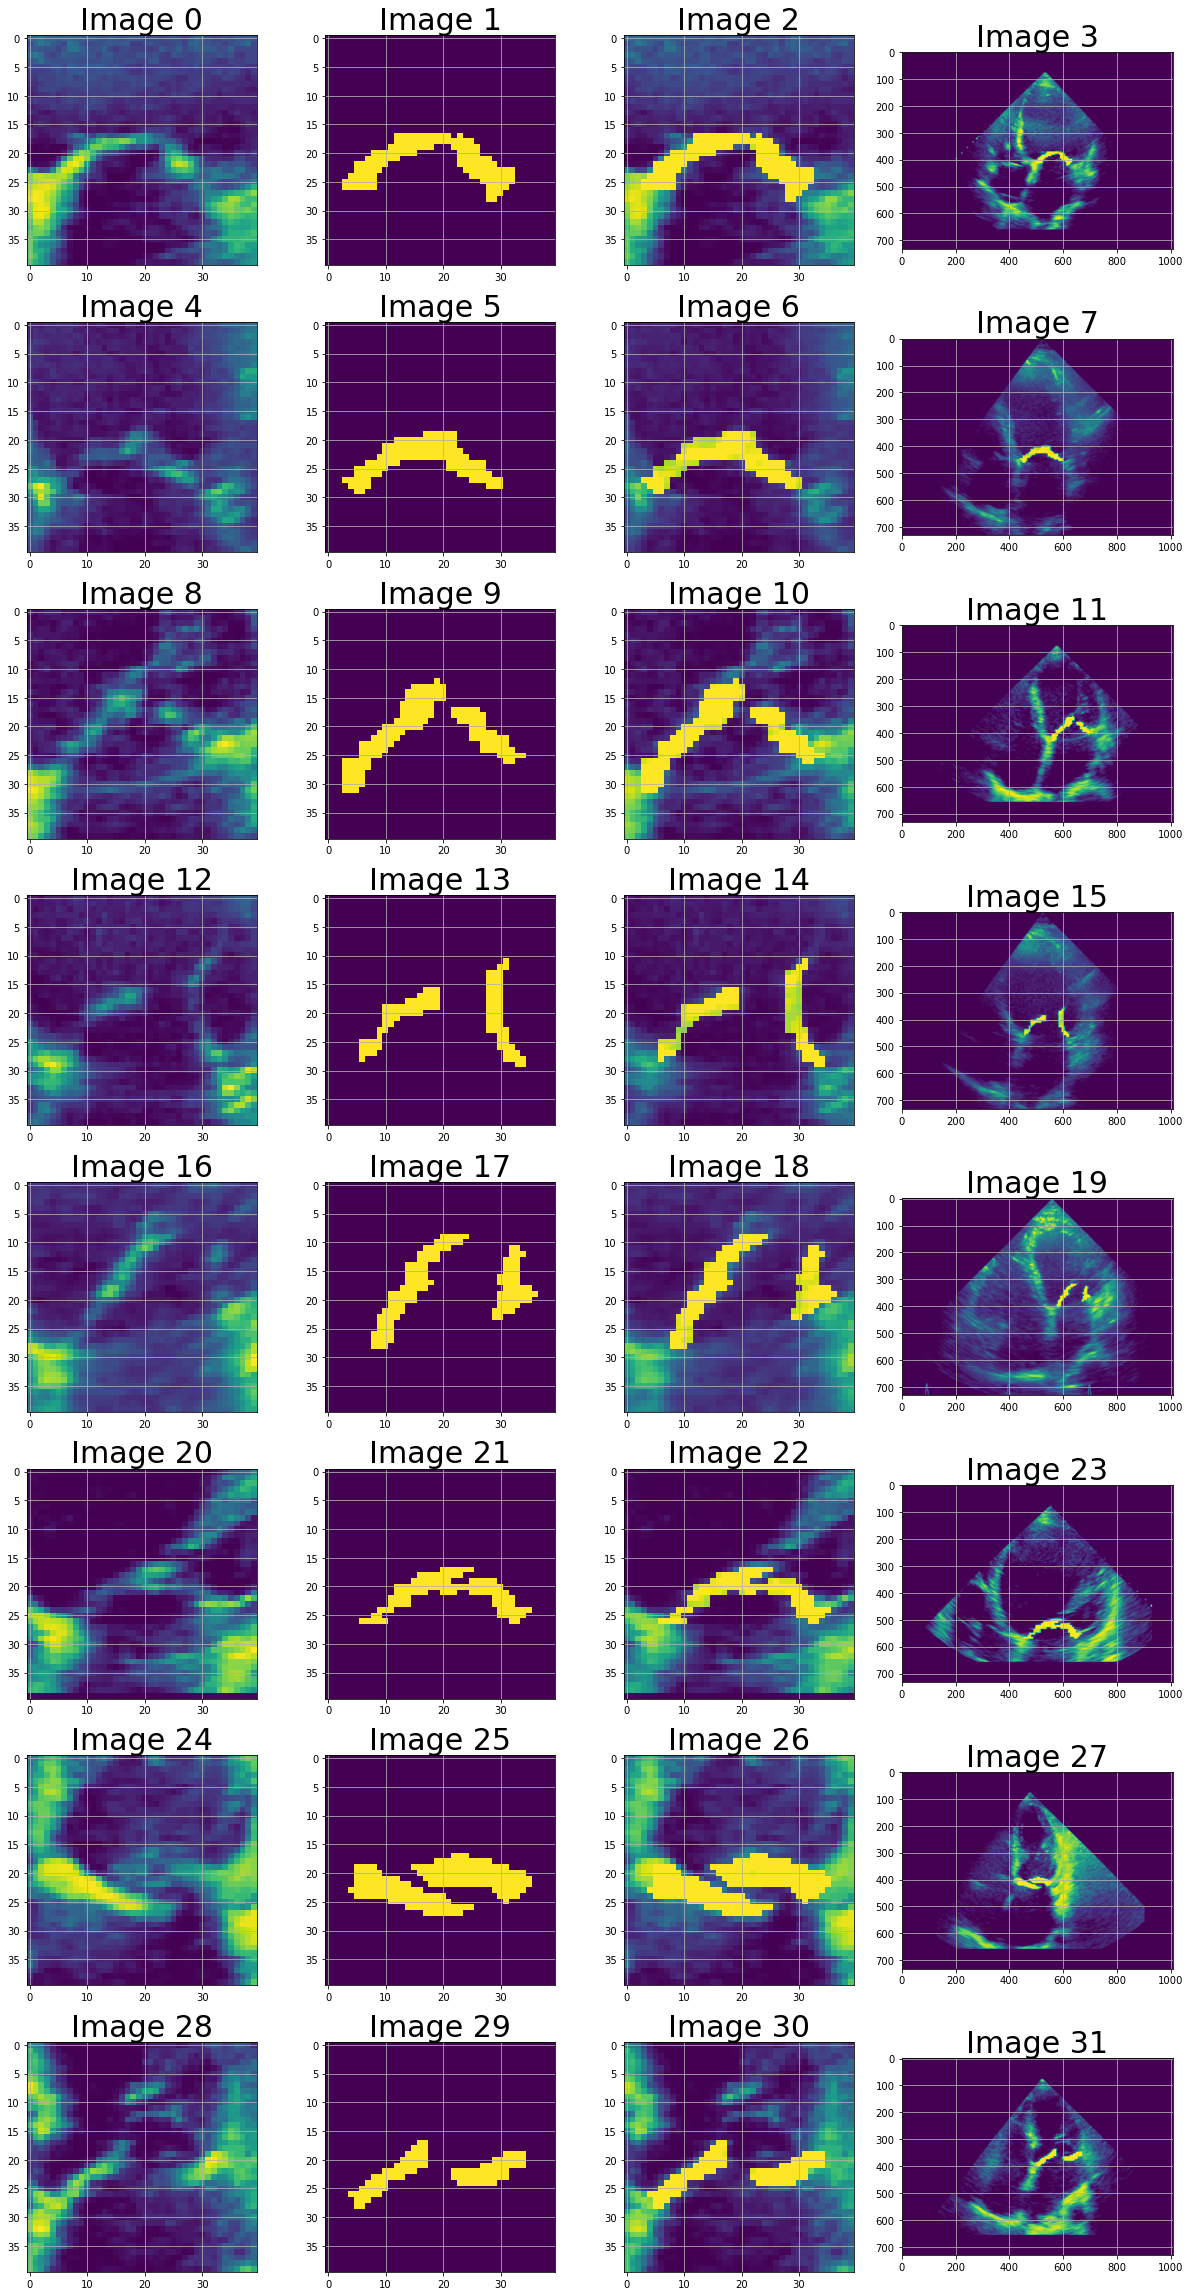

2021-12-31T19:28:21.643232+0100 DEBUG "val" batch keys: dict_keys(['id', 'name', 'frame_cropped', 'orig_frame_dims', 'frame_orig', 'dataset', 'box_mask_props', 'label_cropped'])
2021-12-31T19:28:21.643609+0100 DEBUG Shape of batch frames: torch.Size([8, 1, 40, 40]); shape of batch labels torch.Size([8, 1, 40, 40])
2021-12-31T19:28:21.644098+0100 DEBUG {'top_left': (280, 427), 'bottom_right': (452, 599), 'box_dims': (172, 172), 'h_to_w_ratio': tensor(1., dtype=torch.float64), 'center': (366, 513), 'mask_dims': (750, 1020)}
2021-12-31T19:28:21.644864+0100 DEBUG original frame dims (732, 1007)
2021-12-31T19:28:21.646727+0100 DEBUG {'top_left': (291, 482), 'bottom_right': (473, 664), 'box_dims': (182, 182), 'h_to_w_ratio': tensor(1., dtype=torch.float64), 'center': (382, 573), 'mask_dims': (750, 1020)}
2021-12-31T19:28:21.647420+0100 DEBUG original frame dims (732, 1007)
2021-12-31T19:28:21.649050+0100 DEBUG {'top_left': (242, 473), 'bottom_right': (465, 696), 'box_dims': (223, 223), 'h_to

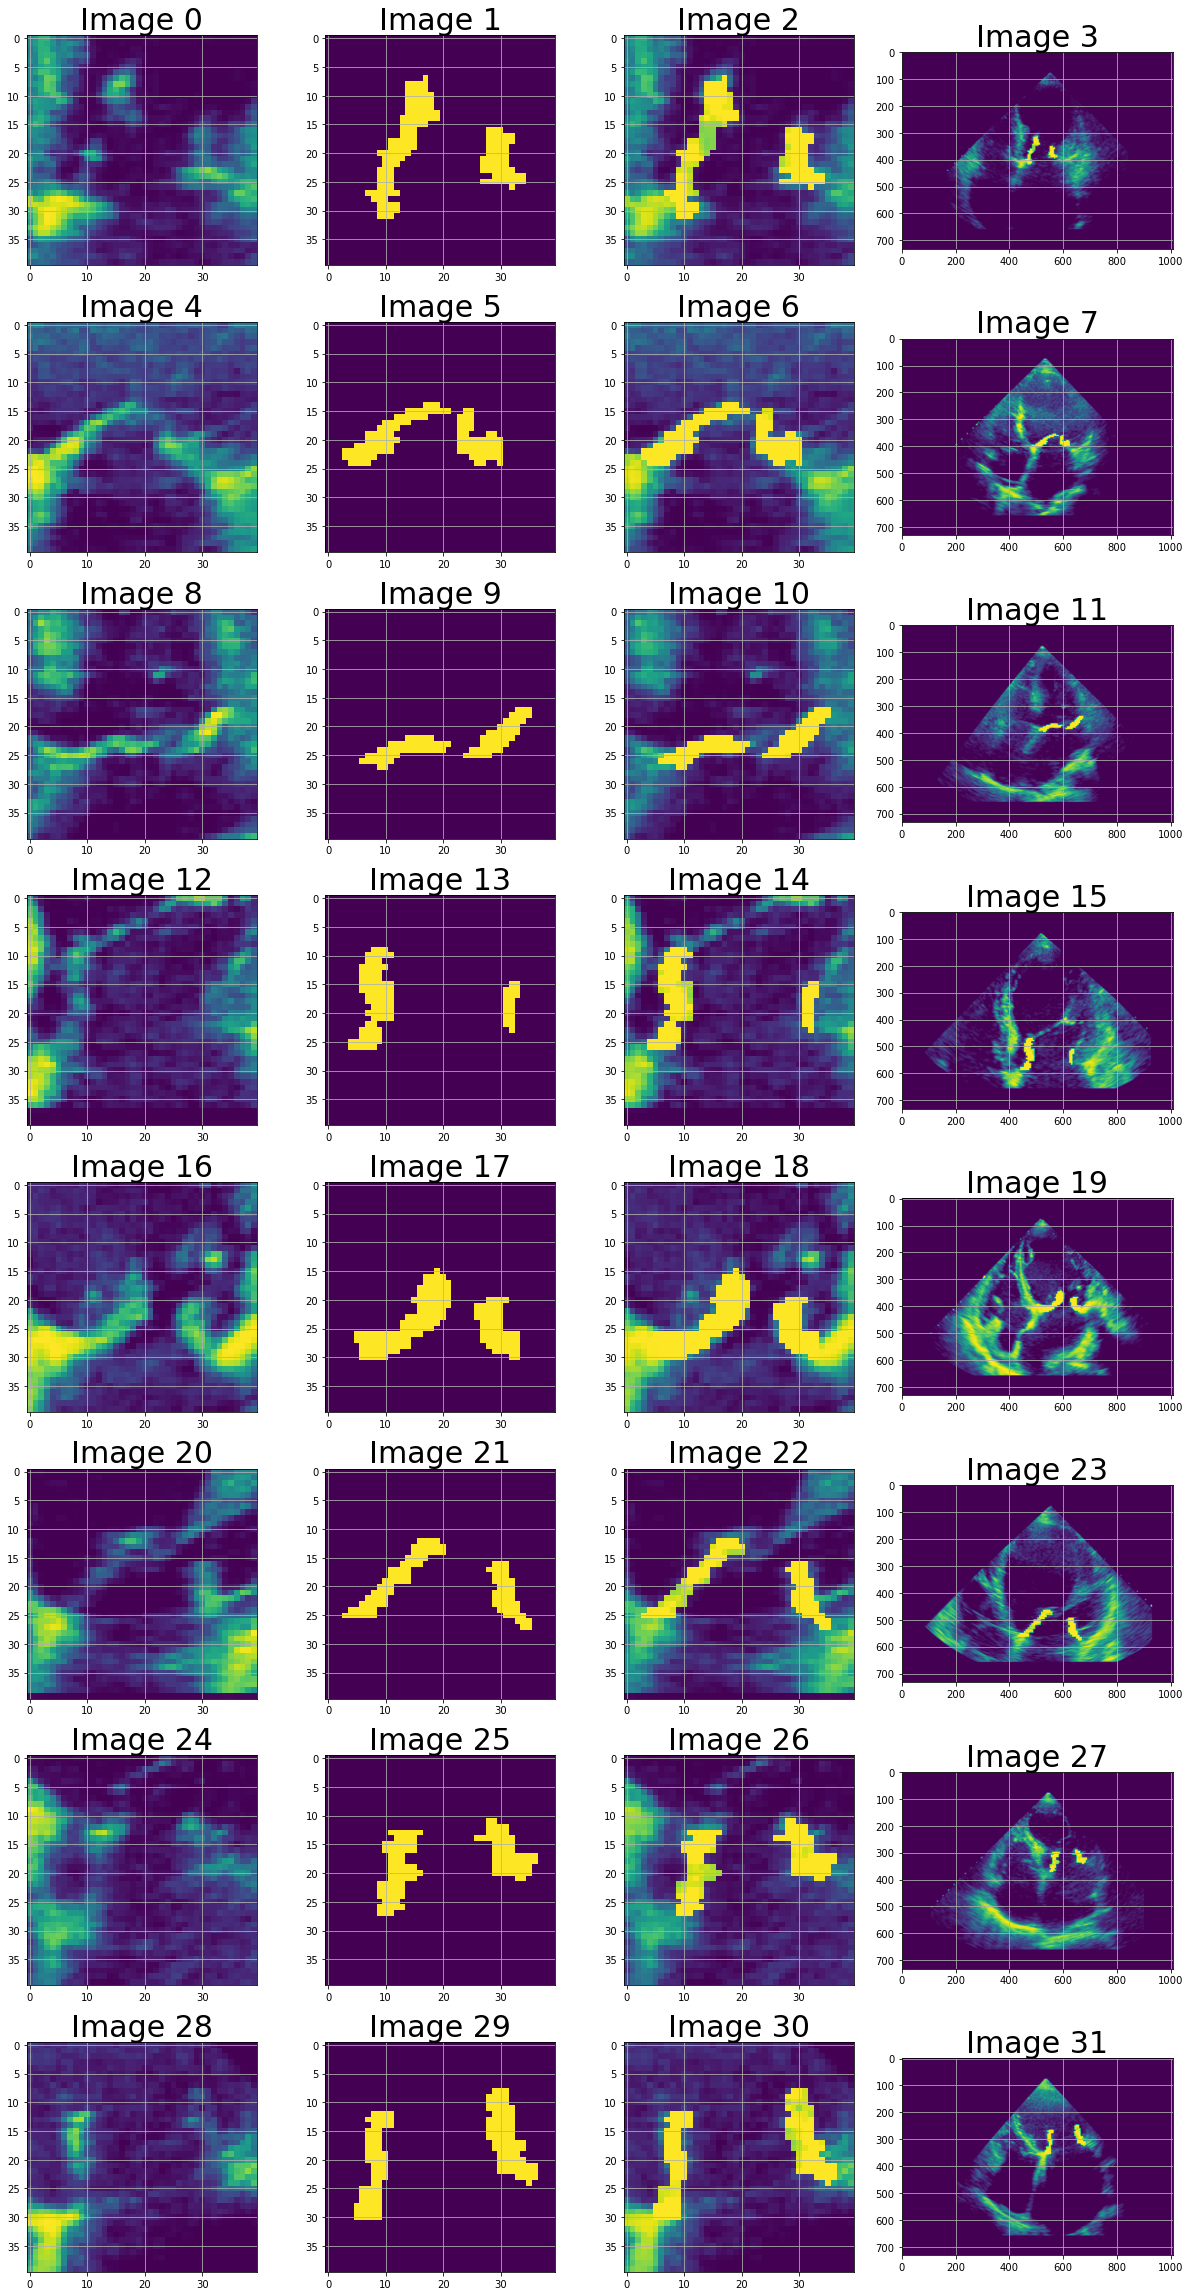

2021-12-31T19:28:23.800495+0100 INFO "test" batch empty or invalid, skipping visualizaton
2021-12-31T19:28:23.800857+0100 DEBUG "submission" batch keys: dict_keys(['id', 'name', 'frame_cropped', 'orig_frame_dims', 'frame_orig'])
2021-12-31T19:28:23.801168+0100 DEBUG Shape of batch frames: torch.Size([1, 1, 40, 40]); shape of batch labels None
2021-12-31T19:28:23.801480+0100 DEBUG {}
2021-12-31T19:28:23.801819+0100 DEBUG original frame dims (732, 1007)


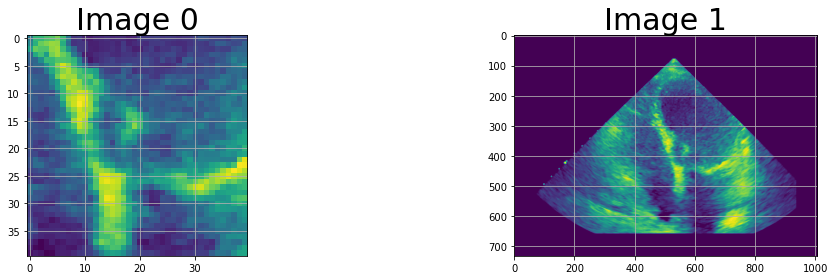

In [22]:
importlib.reload(sys.modules['task3.utils.img_utils'])
from task3.utils.img_utils import show_img_batch

for name, batch in batches.items():
    if type(batch) is dict:
        logger.debug('"{}" batch keys: {}', name, batch.keys())
        show_img_batch(batch)
    else:
        logger.info('"{}" batch empty or invalid, skipping visualizaton', name)
